# Univarite imputing

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('data_science_job.csv',usecols=['city_development_index','experience','training_hours'])
data.isnull().mean()*100

city_development_index    2.500261
experience                0.339284
training_hours            3.998330
dtype: float64

In [91]:
data.head()

,city_development_index,experience,training_hours
0,0.920,20.0,36.0
1,0.776,15.0,47.0
2,0.624,5.0,83.0
3,0.789,0.0,52.0
4,0.767,20.0,8.0


# Mean/Median imputing

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [93]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('experience',axis=1),data['experience'],test_size=0.2)
x_train

,city_development_index,training_hours
12722,0.624,43.0
1240,0.795,54.0
12829,0.926,24.0
13699,0.804,17.0
7057,0.698,25.0
...,...,...
1643,0.920,143.0
1230,0.624,22.0
8549,0.923,8.0
8633,0.624,26.0


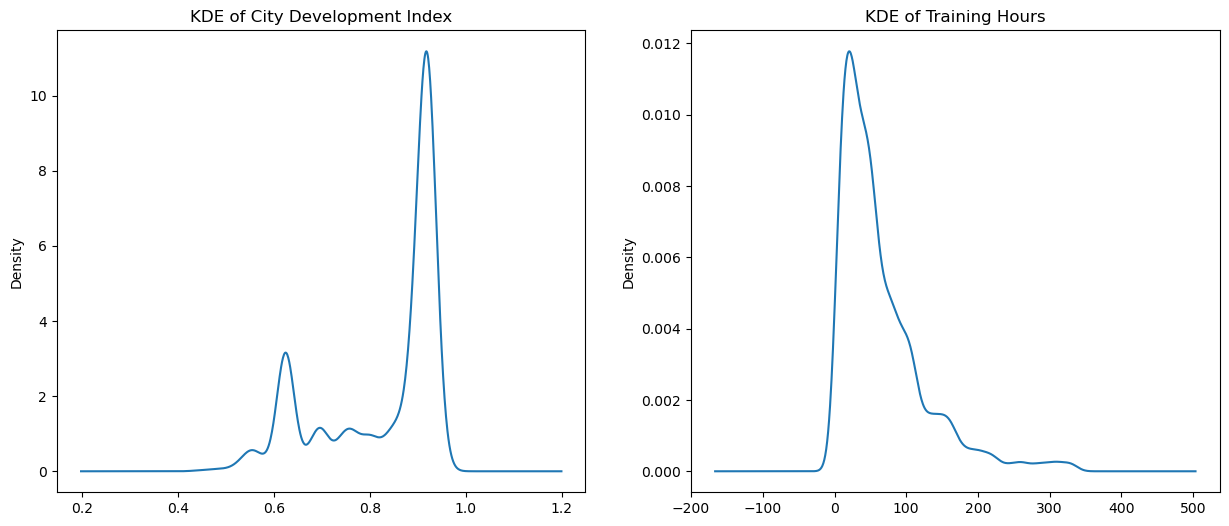

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

x_train['city_development_index'].plot.kde(ax=ax[0])
x_train['training_hours'].plot.kde(ax=ax[1])

ax[0].set_title('KDE of City Development Index')
ax[1].set_title('KDE of Training Hours')
plt.show()


In [95]:
trf1=ColumnTransformer(transformers=[
    ('impute1',SimpleImputer(strategy='mean'),[0]),
    ('impute2',SimpleImputer(strategy='median'),[1])
],remainder='passthrough')

In [96]:
trf1.fit(x_train)
new_train=trf1.transform(x_train)
new_test=trf1.transform(x_test)
new_df=pd.DataFrame(new_train,columns=x_train.columns)


In [97]:
new_df.isnull().sum()

city_development_index    0
training_hours            0
dtype: int64

In [98]:
trf1.named_transformers_['impute1'].statistics_


array([0.82876696])

In [99]:
trf1.named_transformers_['impute2'].statistics_

array([47.])

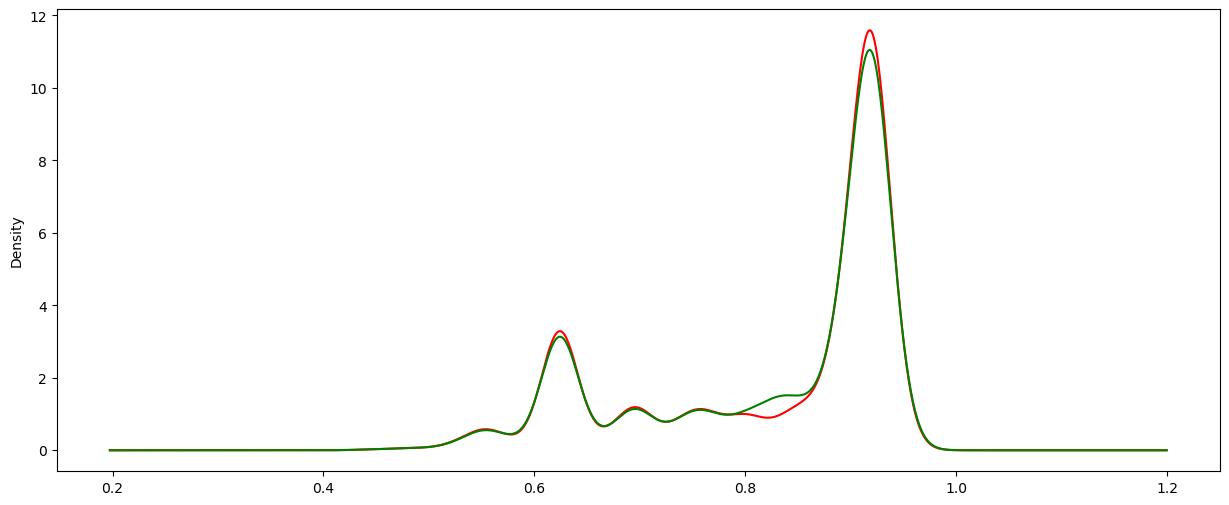

In [106]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
data['city_development_index'].plot(kind='kde',ax=ax,color='red')
new_df['city_development_index'].plot(kind='kde',ax=ax,color='green')
plt.show()

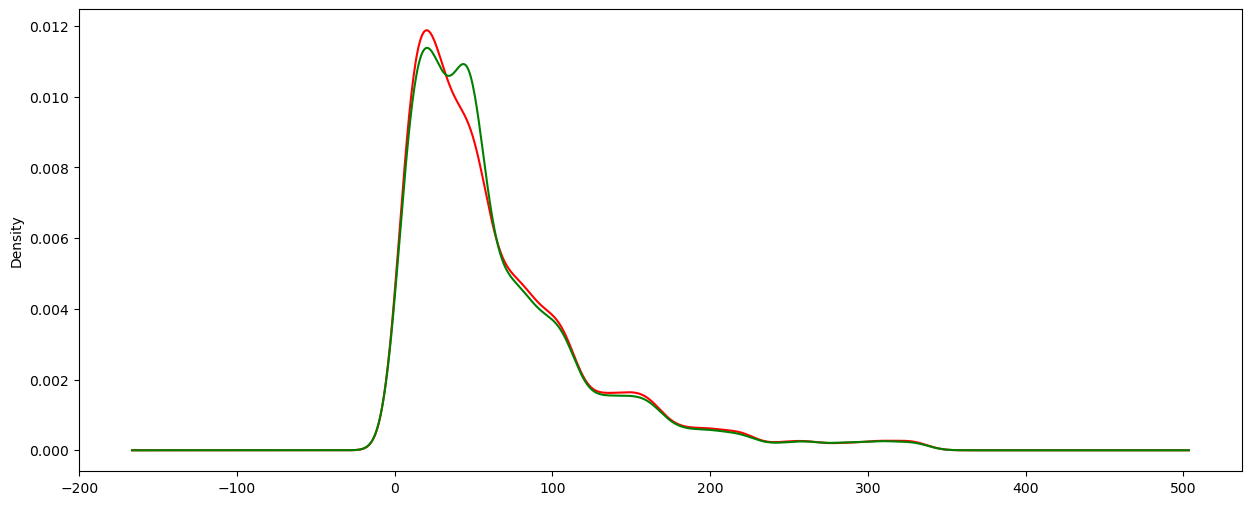

In [107]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
data['training_hours'].plot(kind='kde',ax=ax,color='red')
new_df['training_hours'].plot(kind='kde',ax=ax,color='green')
plt.show()

# Arbitary imputing

In [109]:
trf2=ColumnTransformer(transformers=[
    ('impute3',SimpleImputer(strategy='constant',fill_value=0),[0]),
    ('impute4',SimpleImputer(strategy='constant',fill_value=0),[1])
],remainder='passthrough')

In [111]:
trf2.fit(x_train)
n_train=trf2.transform(x_train)
n_test=trf2.transform(x_test)
new_data=pd.DataFrame(new_train,columns=x_train.columns)

In [114]:
trf2.named_transformers_['impute3'].statistics_

array([0.])

In [115]:
trf2.named_transformers_['impute4'].statistics_

array([0.])

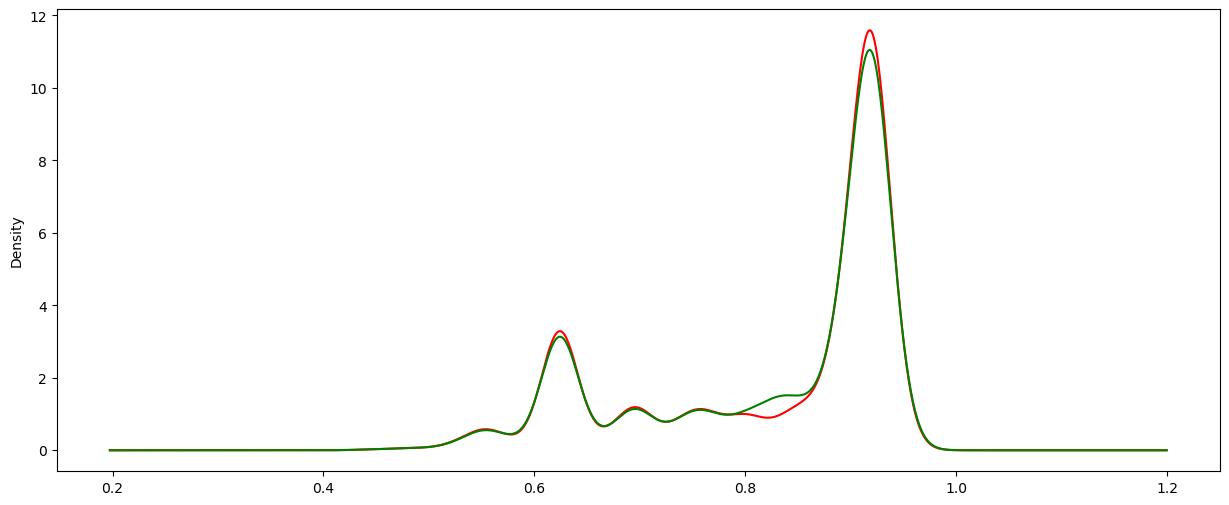

In [117]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
data['city_development_index'].plot(kind='kde',ax=ax,color='red')
new_data['city_development_index'].plot(kind='kde',ax=ax,color='green')
plt.show()

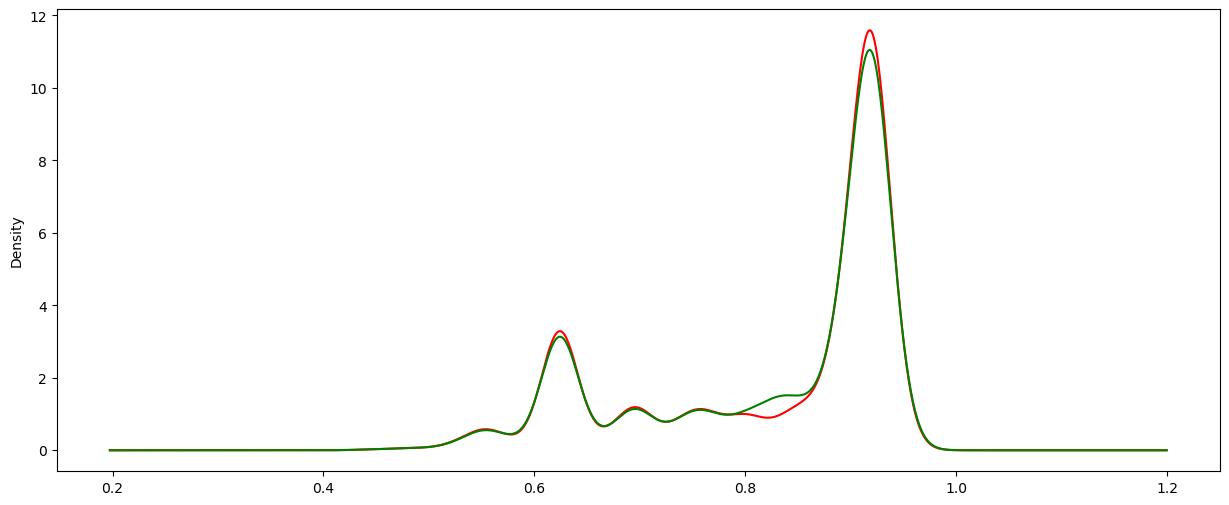

In [116]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
data['city_development_index'].plot(kind='kde',ax=ax,color='red')
new_data['city_development_index'].plot(kind='kde',ax=ax,color='green')
plt.show()